# Insurance Premiuim Prediction


In [167]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading and understanding the data

In [168]:
# Reading the dataset in 'insurance' variable
insurance = pd.read_csv("insurance.csv")

In [169]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [170]:
# Checking the shape(rows, columns) of the dataset
insurance.shape

(1338, 7)

The dataset contains 1338 rows and 7 columns

In [171]:
# Checking the dataset for null values and respective datatypes
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataypes of the respective columns seems relevant.
No need of any changes. <br>
There are 4 numeric columns and 3 categorical columns present in the dataset.

In [172]:
# Checking the null values in the dataset
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

There are no null values present in the dataset.

In [173]:
# Describe the data to view some statistical information about it.
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [174]:
# Checking the count of values in 'smoker' column
insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

There are total 1064 non-smokers and 274 smokers in the dataset.

In [175]:
# Checking the count of genders from 'gender' column
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

There are total 676 males and 662 females in the dataset.

In [176]:
# Checking the count if values in 'region' column
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

There are total 4 regions 'southeast', 'southwest', 'northwest' and 'northeast' with count 364, 325, 325, 324 respectively.<br>


In [177]:
# Checking the duplicates present in the dataset.
insurance.duplicated().sum()

1

There is 1 duplicate present in the dataset

In [178]:
# Dropping the dataset and checking the shape again.
insurance = insurance.drop_duplicates()
insurance.shape

(1337, 7)

## Visualizing the data

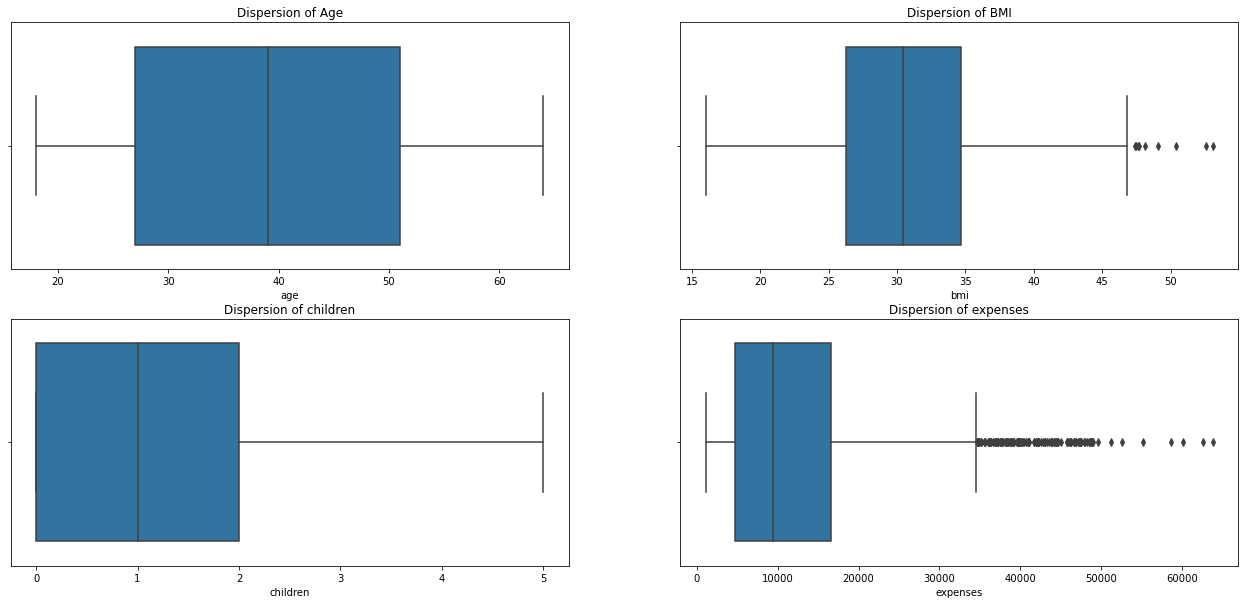

In [179]:
# Visualizing the outliers in the numerical columns
plt.figure(figsize = (22,10))

plt.subplot(2,2,1)
ax = sns.boxplot(insurance['age'])
ax.set_title('Dispersion of Age')

plt.subplot(2,2,2)
ax = sns.boxplot(insurance['bmi'])
ax.set_title('Dispersion of BMI')

plt.subplot(2,2,3)
ax = sns.boxplot(insurance['children'])
ax.set_title('Dispersion of children')

plt.subplot(2,2,4)
ax = sns.boxplot(insurance['expenses'])
ax.set_title('Dispersion of expenses')
plt.show()

The boxplot shows that the columns 'bmi' and 'expenses' contains outliers.

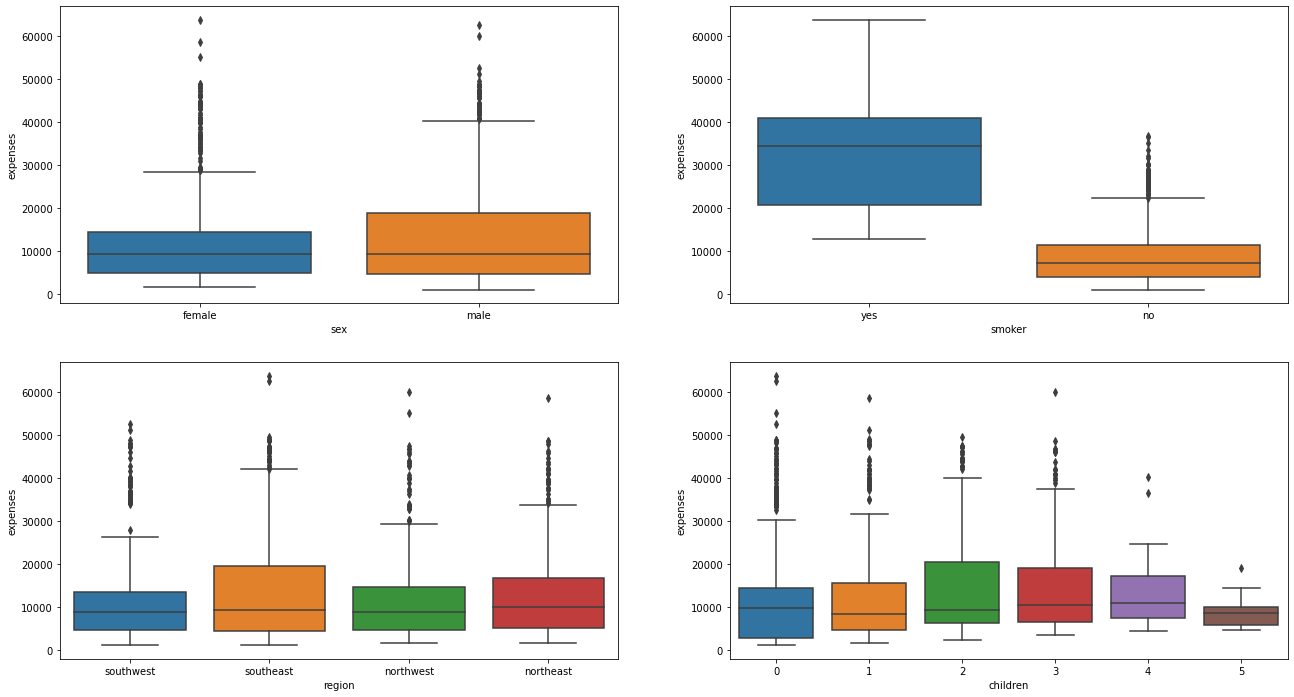

In [180]:
# Analysing the categorical variables w.r.t. the target variable 'expenses'
plt.figure(figsize = (22,12))
plt.subplot(2,2,1)
sns.boxplot(data = insurance, x ='sex', y = 'expenses')

plt.subplot(2,2,2)
sns.boxplot(data = insurance, x ='smoker', y = 'expenses')

plt.subplot(2,2,3)
sns.boxplot(data = insurance, x ='region', y = 'expenses')

plt.subplot(2,2,4)
sns.boxplot(data = insurance, x ='children', y = 'expenses')

plt.show()

The columns w.r.t 'expenses' show following inferences:<br>
1. Medical expenses are seen to be more from male rather than females
2. Smokers medical expense is far more as compared to the non-smokers 
3. Among the regions the southwest region promoted the most meedical expense.

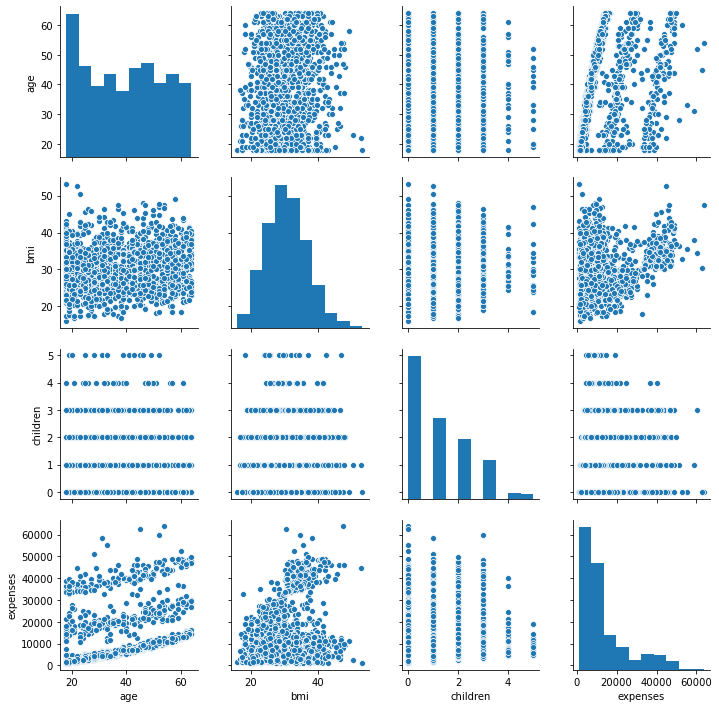

In [181]:
# Analysing the numeric columns
sns.pairplot(insurance)
plt.show()

<AxesSubplot:>

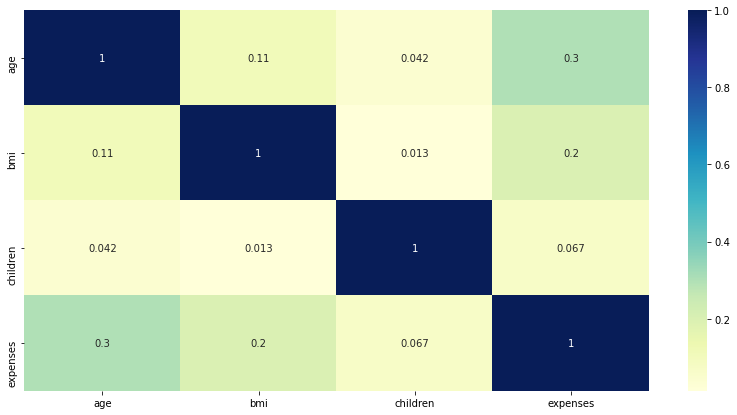

In [182]:
# Correlation heatmap for the numeric columns
plt.figure(figsize = (14,7))
sns.heatmap(insurance.corr(), annot=True, cmap="YlGnBu")

The above heatmaps gives inferences as follows:
1. 'age' and 'expenses' are the most high positive correlation between them of 0.3
2. Then it is follwed by 'bmi' and 'expenses' with correlation id of 0.2
3. 'children' and 'bmi' shows the least correlation between of 0.013

## Step 3: Data Preparation

In [183]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 123.6+ KB


In [184]:
#Extract all categorical variables in a seperate dataframe 'df_cat'
cat_cols = insurance.select_dtypes(include = ['object']).columns
df_cat = insurance[cat_cols]
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [185]:
# one hot encoding - convert into dummies
# Create dummy variabkes of the categrical variables
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [186]:
# Concatenating the dummy variables with the original dataframe and storing in new dataframe 'insurance_processed'
insurance_processed = pd.concat([insurance, df_dummies], axis = 1)
insurance_processed.head()

,age,sex,bmi,children,smoker,region,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.9,0,yes,southwest,16884.92,0,1,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0,0,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0,0,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0,1,0,0
4,32,male,28.9,0,no,northwest,3866.86,1,0,1,0,0


In [187]:
# Dropping the original categorical columns to avoid redundancy
insurance_processed.drop(cat_cols, axis = 1,inplace=True)
insurance_processed.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


## Scaling

In [188]:
# Importing the necessary packages and splitting the data into testing and training dataset
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(insurance_processed, train_size = 0.7, test_size = 0.3, random_state = 100)

In [189]:
# Checking the train dataset's shape
df_train.shape

(935, 9)

In [190]:
# Checking the test dataset's shape
df_test.shape

(402, 9)

In [191]:
# Imports for scaling operation (We are using MinMax Scaling here)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [192]:
df_train.describe()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,38.972193,30.663850,1.073797,13402.733701,0.504813,0.204278,0.238503,0.271658,0.253476
std,14.134763,6.149412,1.192369,12381.482666,0.500244,0.403389,0.426396,0.445052,0.435234
min,18.000000,16.000000,0.000000,1121.870000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.200000,0.000000,4527.545000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9304.700000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.850000,2.000000,17482.645000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,53.100000,5.000000,63770.430000,1.000000,1.000000,1.000000,1.000000,1.000000


Columns 'age', 'bmi', 'children', 'expenses' needs to be scaled.

In [193]:
# Scaling the values of 'age', 'bmi', 'children', 'expenses' columns 
var = ['age', 'bmi', 'children', 'expenses']
df_train[var]=scaler.fit_transform(df_train[var])

# Checking the scaled values
df_train.describe()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.455917,0.395252,0.214759,0.196028,0.504813,0.204278,0.238503,0.271658,0.253476
std,0.307277,0.165752,0.238474,0.197634,0.500244,0.403389,0.426396,0.445052,0.435234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.274933,0.000000,0.054362,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388140,0.200000,0.130615,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.508086,0.400000,0.261152,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


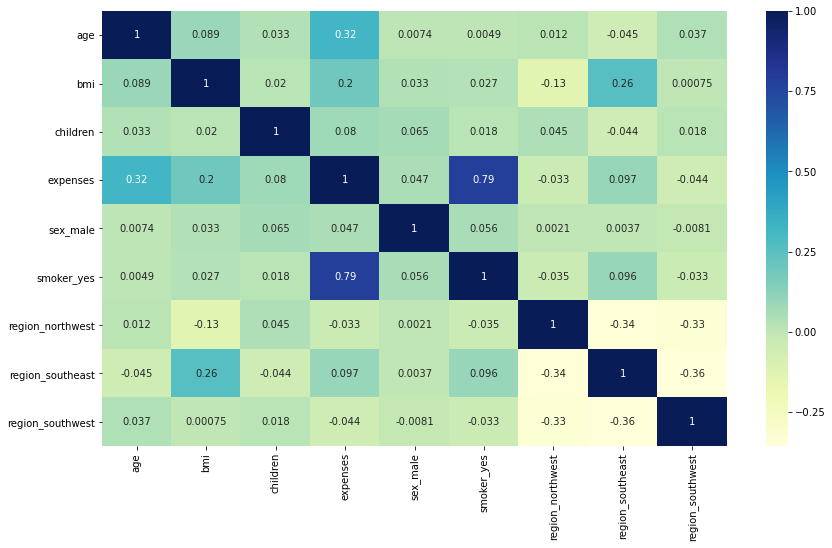

In [194]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (14, 8))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see the following inferences from the above heatmap:
1. 'smoker_yes' and 'expenses' shows high positive correlation of 0.79 which can create a multi colinearity problem.

<AxesSubplot:xlabel='smoker_yes', ylabel='expenses'>

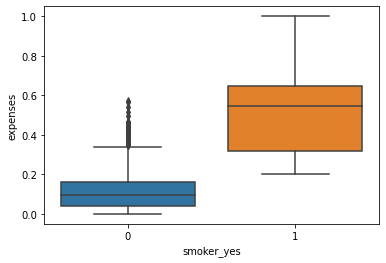

In [195]:
# Plotting 'smoker' vs 'expenses'
sns.boxplot(data = df_train, x ='smoker_yes', y = 'expenses')

Clearly the smokers i.e. the 'smoker_yes' column in the dataset promote to more medical expense.

## Model Building

In [196]:
# Splitting the train data into X and y train and deleting the 'expenses' column.
y_train=df_train.pop('expenses')
X_train=df_train

### RFE

In [197]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [198]:
lm = LinearRegression()
# Fitting the model in the dataset
lm.fit(X_train, y_train)
print("Intercept : ", lm.intercept_)
print("Slope : ", lm.coef_)
# Selecting 8 features from the dataset
rfe = RFE(lm, 8)
rfe = rfe.fit(X_train, y_train)

Intercept :  -0.041818618818070225
Slope :  [ 0.19413983  0.18140953  0.04489899 -0.00309735  0.38305704 -0.00588252
 -0.00921453 -0.01889941]


In [199]:
# Checking the selected variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('bmi', True, 1),
 ('children', True, 1),
 ('sex_male', True, 1),
 ('smoker_yes', True, 1),
 ('region_northwest', True, 1),
 ('region_southeast', True, 1),
 ('region_southwest', True, 1)]

In [200]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [201]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [202]:
# Creating X_train dataframe 'X_train_rfe' with RFE selected true variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
967,0.565217,0.253369,0.2,1,0,1,0,0
522,0.717391,0.482480,0.0,0,0,0,0,0
155,0.565217,0.633423,0.0,1,0,1,0,0
672,0.391304,0.369272,0.0,1,0,0,1,0
1173,0.434783,0.358491,0.4,1,0,1,0,0


### Building model using statsmodel, for the detailed statistics


In [203]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function for linear regression model
def build_model(X,y):
    X = sm.add_constant(X) #Add a constant
    lm = sm.OLS(y,X).fit() # Create a first fitted model
    print(lm.summary()) # model summary
    return X

In [204]:
# Function to create VIF
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model 1

In [205]:
# Building the first model
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     341.4
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          4.57e-270
Time:                        20:15:18   Log-Likelihood:                 831.86
No. Observations:                 935   AIC:                            -1646.
Df Residuals:                     926   BIC:                            -1602.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0418      0.011  

In [206]:
# Checking the VIF of the variables
checkVIF(X_train_new)

,Features,VIF
0,const,12.26
7,region_southeast,1.68
8,region_southwest,1.56
6,region_northwest,1.53
2,bmi,1.10
1,age,1.01
3,children,1.01
4,sex_male,1.01
5,smoker_yes,1.01


In [207]:
X_train_new=X_train_new.drop(["sex_male"], axis = 1)

#### Model 2

In [208]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     390.4
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          2.49e-271
Time:                        20:15:19   Log-Likelihood:                 831.75
No. Observations:                 935   AIC:                            -1648.
Df Residuals:                     927   BIC:                            -1609.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0432      0.011  

In [209]:
checkVIF(X_train_new)

,Features,VIF
0,const,11.51
6,region_southeast,1.68
7,region_southwest,1.56
5,region_northwest,1.53
2,bmi,1.10
1,age,1.01
3,children,1.01
4,smoker_yes,1.01


In [210]:
X_train_new=X_train_new.drop(["region_northwest"], axis = 1)

#### Model 3

In [211]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     455.7
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          1.35e-272
Time:                        20:15:19   Log-Likelihood:                 831.56
No. Observations:                 935   AIC:                            -1649.
Df Residuals:                     928   BIC:                            -1615.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0460      0.010  

In [212]:
checkVIF(X_train_new)

,Features,VIF
0,const,9.54
5,region_southeast,1.26
6,region_southwest,1.16
2,bmi,1.10
1,age,1.01
4,smoker_yes,1.01
3,children,1.00


In [213]:
X_train_new=X_train_new.drop(["region_southeast"], axis = 1)

#### Model 4

In [214]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     547.0
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          7.33e-274
Time:                        20:15:19   Log-Likelihood:                 831.27
No. Observations:                 935   AIC:                            -1651.
Df Residuals:                     929   BIC:                            -1621.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0467      0.010  

In [215]:
checkVIF(X_train_new)

,Features,VIF
0,const,9.45
1,age,1.01
2,bmi,1.01
3,children,1.00
4,smoker_yes,1.00
5,region_southwest,1.00


In [216]:
X_train_new=X_train_new.drop(["region_southwest"], axis = 1)

#### Model 5

In [217]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     681.3
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          1.37e-274
Time:                        20:15:19   Log-Likelihood:                 829.61
No. Observations:                 935   AIC:                            -1649.
Df Residuals:                     930   BIC:                            -1625.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0499      0.010     -5.043      0.0

In [218]:
checkVIF(X_train_new)

,Features,VIF
0,const,9.17
1,age,1.01
2,bmi,1.01
3,children,1.00
4,smoker_yes,1.00


Analysis:
- Our final model has 4 columns
- R-squared: 0.746
- Adj. R-squared: 0.744
- VIF is less than 2
- P-value is less than 0.05

### Residual Analysis

In [219]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred= lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

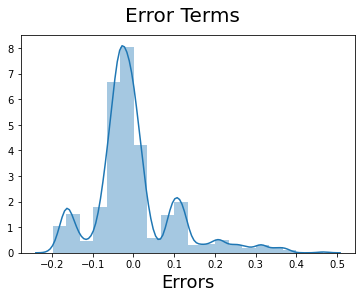

In [221]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

The distplot shows normal distribution thus the error terms are normally distributed.

## Prediction and Evaluation

In [222]:
df_test.describe()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,39.803483,30.669403,1.146766,12991.615970,0.504975,0.206468,0.251244,0.273632,0.218905
std,13.831681,5.993328,1.235732,11464.799006,0.500598,0.405274,0.434269,0.446378,0.414020
min,18.000000,16.800000,0.000000,1131.510000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,26.400000,0.000000,5261.177500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,30.200000,1.000000,9674.460000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,34.100000,2.000000,14928.102500,1.000000,0.000000,0.750000,1.000000,0.000000
max,64.000000,49.100000,5.000000,60021.400000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
# Scaling the values of 'age', 'bmi', 'children', 'expenses' columns 
var = ['age', 'bmi', 'children', 'expenses']
df_test[var]=scaler.fit_transform(df_test[var])

# Checking the scaled values
df_test.describe()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.473989,0.429393,0.229353,0.201395,0.504975,0.206468,0.251244,0.273632,0.218905
std,0.300689,0.185552,0.247146,0.194682,0.500598,0.405274,0.434269,0.446378,0.414020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217391,0.297214,0.000000,0.070125,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.478261,0.414861,0.200000,0.145066,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.739130,0.535604,0.400000,0.234278,1.000000,0.000000,0.750000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing the testset into X and Y sets for the model building

In [224]:
#Dividing into X and y and deleting 'expenses' column
y_test = df_test.pop('expenses')
X_test = df_test

In [225]:
X_train_new.head()

,const,age,bmi,children,smoker_yes
967,1.0,0.565217,0.253369,0.2,0
522,1.0,0.717391,0.482480,0.0,0
155,1.0,0.565217,0.633423,0.0,0
672,1.0,0.391304,0.369272,0.0,0
1173,1.0,0.434783,0.358491,0.4,0


In [226]:
# Dropping the const variable
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new) # Add a constant

In [227]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [228]:
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_pred)
print('R2 score:',r2)

R2 score: 0.7620299362061814


In [229]:
X_test_new.shape


(402, 5)

In [230]:
# Storing the number of rows in n
n = X_test_new.shape[0]

# Storing the number of features in p
p = X_test_new.shape[1]

# Finding the adjusted R-square score
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Adj. R2 score:',adjusted_r2)

Adj. R2 score: 0.7590252636835322


Text(0, 0.5, 'y_pred')

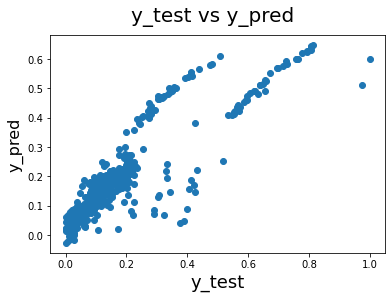

In [231]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Analysis:
- The scatter plot clearly shows that the predicted values have a linear relationship with the actual values.

- Train Set:
 - R-squared: 0.746 
 - Adj. R-squared: 0.744
 
- Test Set:
 - R-squared: 0.762
 - Adj. R-squared: 0.759 

- The difference between the R-squared value for the train and test dataset is not more than 5%, Therefore it's a good model.
- The difference between the Adj R-squared value for the train and test dataset is not more than 5%, Therefore it's a good model.

In [232]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     681.3
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          1.37e-274
Time:                        20:16:03   Log-Likelihood:                 829.61
No. Observations:                 935   AIC:                            -1649.
Df Residuals:                     930   BIC:                            -1625.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0499      0.010     -5.043      0.0

Analysis:
- Based on the above summary that we have for our variables, our linear regression equation for predicting the insurance premium becomes:
> expenses = -0.0499 + 0.1939 x age + 0.1767 x bmi + 0.0442 x children + 0.3828 x smoker_yes
